In [13]:
import cv2 as cv
import glob 
import os
import tensorflow as tf
import numpy as np
import albumentations as alb
import matplotlib.pyplot as plt

### EDA

In [274]:
data=tf.keras.utils.image_dataset_from_directory('data_gambar',image_size=(256,256))

Found 17 files belonging to 2 classes.


In [275]:
classes=data.class_names

In [276]:
# image visualization function
def dataVisual(images,labels,data):
    plt.figure(figsize=(10,10))
    for images, labels in data:
        for i in range(9):
            ax =plt.subplot(3,3, i+1)
            plt.imshow((images[i].numpy().astype("uint8")))
            plt.title(int(labels[i]))
            plt.axis("off")

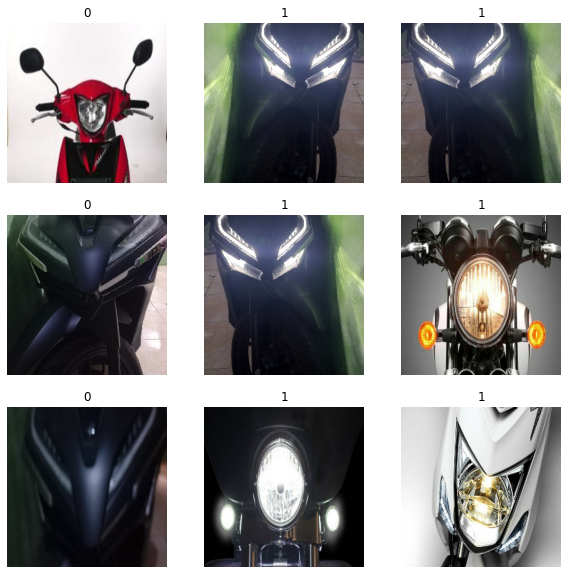

In [277]:
dataVisual(data,classes,data.take(1))

In [25]:
menyala_images=[] #Load data lampu Menyala
for dir in glob.glob('data_gambar/lampu_nyala'):
    for image in glob.glob(os.path.join(dir,"*jpg")):
        img=cv.imread(image)
        menyala_images.append(img)

In [27]:
mati_images=[] #Load data lampu Mati
for dir in glob.glob('data_gambar/lampu_mati'):
    for image in glob.glob(os.path.join(dir,"*jpg")):
        img=cv.imread(image)
        mati_images.append(img)

In [28]:
print(f"Total gambar lampu menyala -> {len(menyala_images)}")
print(f"Total gambar lampu mati -> {len(mati_images)}")

Total gambar lampu menyala -> 7
Total gambar lampu mati -> 10


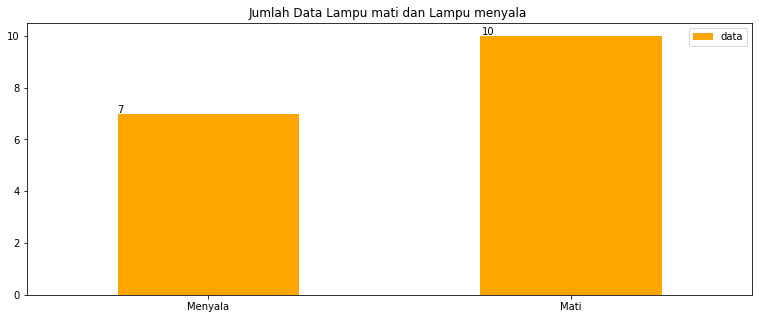

In [30]:
import pandas as pd

# visualisasi jumlah data training dan data validation
data= [len(menyala_images),len(mati_images)]

index = ['Menyala','Mati']
data_am = pd.DataFrame({'data': data}, index=index)
ax = data_am.plot.bar(rot=0, color=['orange'], figsize=(13,5))
ax.set_title("Jumlah Data Lampu mati dan Lampu menyala ")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.savefig("Data_lampu.png")


### Augemntasi

In [95]:
aug=alb.Compose([
                alb.HorizontalFlip(p=0.5),
                alb.RandomBrightnessContrast(p=0.2),
                alb.RandomContrast(p=0.2),
                         ])

c:\Users\Reza\anaconda3\lib\site-packages\albumentations\augmentations\transforms.py:1826: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


## save augmentasi 

- data train
- data test
- data val

In [111]:
for image_load in ['lampu_nyala'] :
    for label in ['lampu_menyala']:
        for partition in ['train','val','test']: 
            for image in os.listdir(os.path.join( partition,image_load)):
                img = cv.imread(os.path.join( image_load,  image))
                try: 
                    for x in range(60):
                        augmented = aug(image=img)
                        cv.imwrite(os.path.join('aug',partition,label, f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                except Exception as e:
                    print(e)

In [112]:
for image_load in ['lampu_mati'] :
    for label in ['lampu_mati']:
        for partition in ['train','val','test']: 
            for image in os.listdir(os.path.join( partition,image_load)):
                img = cv.imread(os.path.join( image_load,  image))
                try: 
                    for x in range(60):
                        augmented = aug(image=img)
                        cv.imwrite(os.path.join('aug',partition,label, f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                except Exception as e:
                    print(e)

#### Split data

In [439]:
data_train=tf.keras.utils.image_dataset_from_directory(
'aug/train',
image_size=(256,256),
label_mode="binary",
batch_size=5,
seed=100
)

data_test=tf.keras.utils.image_dataset_from_directory(
'aug/test',
image_size=(256,256),
label_mode="binary",
batch_size=5,
seed=100

)

data_val=tf.keras.utils.image_dataset_from_directory(
'aug/val',
image_size=(256,256),
label_mode="binary",
batch_size=5,
seed=100
)

Found 300 files belonging to 2 classes.
Found 240 files belonging to 2 classes.
Found 120 files belonging to 2 classes.


In [440]:
class_train=data_train.class_names
print(class_train)

['lampu_mati', 'lampu_menyala']


### Create model cnn

In [441]:
model_cnn = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(256,256,3)),

# layar konvolusi pertama
tf.keras.layers.Conv2D(16, (3,3),  activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Kedua
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),



tf.keras.layers.Dropout(0.3),

#Lakukan Flatten
tf.keras.layers.Flatten(),

#Lakukan Fully connected layer
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
   
])

In [442]:
model_cnn.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [443]:
history_=model_cnn.fit(
               data_train,
                steps_per_epoch=5,
                epochs=5,
                validation_data=data_val, 
                validation_steps=5, 
                )

Epoch 1/5
5/5 [==============================] - 2s 343ms/step - loss: 2.2883 - accuracy: 0.6000 - val_loss: 1.1356 - val_accuracy: 0.4800
Epoch 2/5
5/5 [==============================] - 1s 302ms/step - loss: 0.6685 - accuracy: 0.7200 - val_loss: 0.5091 - val_accuracy: 0.7600
Epoch 3/5
5/5 [==============================] - 1s 320ms/step - loss: 0.2560 - accuracy: 0.8800 - val_loss: 0.2670 - val_accuracy: 1.0000
Epoch 4/5
5/5 [==============================] - 1s 308ms/step - loss: 0.1034 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 1.0000
Epoch 5/5
5/5 [==============================] - 1s 312ms/step - loss: 0.0488 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 1.0000


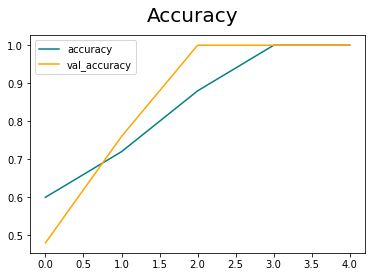

In [444]:
fig = plt.figure()
plt.plot(history_.history['accuracy'], color='teal', label='accuracy')
plt.plot(history_.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc_.png")
plt.show()

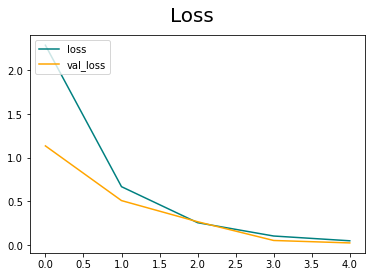

In [445]:
fig = plt.figure()
plt.plot(history_.history['loss'], color='teal', label='loss')
plt.plot(history_.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("Loss_And_valLoss_.png")
plt.show()

## Save model

In [446]:
# os.mkdir('model')
modelku=model_cnn.save(os.path.join('model','imageclassifier_lamp.h5'))
load_model_=tf.keras.models.load_model('model/imageclassifier_lamp.h5')

## Predicted

In [447]:
from tensorflow.keras.utils import load_img

In [448]:
predict=model_cnn.predict(data_test)
print(predict)

48/48 [==============================] - 2s 32ms/step
[[0.7666616 ]
 [0.8439255 ]
 [0.98067665]
 [0.7444748 ]
 [0.87575746]
 [0.90192497]
 [0.90192497]
 [0.7444748 ]
 [0.9539113 ]
 [0.9962714 ]
 [0.98330003]
 [0.97666055]
 [0.90192497]
 [0.98067665]
 [0.7444748 ]
 [0.90192497]
 [0.7444748 ]
 [0.9965865 ]
 [0.90192497]
 [0.90192497]
 [0.9940204 ]
 [0.98350096]
 [0.9068633 ]
 [0.98067665]
 [0.7911422 ]
 [0.8439255 ]
 [0.8439255 ]
 [0.9839595 ]
 [0.87575746]
 [0.9960352 ]
 [0.9096539 ]
 [0.9960352 ]
 [0.98330003]
 [0.98067665]
 [0.9960352 ]
 [0.9923054 ]
 [0.7783761 ]
 [0.98067665]
 [0.87575746]
 [0.7592075 ]
 [0.9190408 ]
 [0.9960352 ]
 [0.9960352 ]
 [0.90192497]
 [0.8767302 ]
 [0.8043327 ]
 [0.90192497]
 [0.98067665]
 [0.9962714 ]
 [0.79517007]
 [0.90192497]
 [0.8439255 ]
 [0.9960352 ]
 [0.9962714 ]
 [0.74416584]
 [0.9114853 ]
 [0.98330003]
 [0.87575746]
 [0.9960352 ]
 [0.99062204]
 [0.882682  ]
 [0.7444748 ]
 [0.7444748 ]
 [0.7444748 ]
 [0.98067665]
 [0.98067665]
 [0.9962714 ]
 [0.9001

In [300]:
predict[0]

array([0.6070492], dtype=float32)

In [449]:
# image visualization function
def dataVisual_train(images,labels,data):
    plt.figure(figsize=(10,10))
    for images, labels in data:
        for i in range(5):
            ax =plt.subplot(3,3, i+1)
            plt.imshow((images[i].numpy().astype("uint8")))
            plt.title(int(labels[i]))
            plt.axis("off")

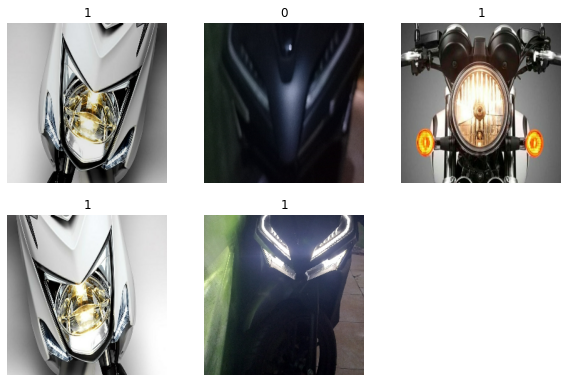

In [450]:
dataVisual_train(data_train,predict,data_train.take(1))

In [379]:
# class_names = {
#     0:"Lampu menyala",
#     1:"Lampu mati"
# }
# type(class_names)

dict

In [451]:
test_label=data_test.class_names
test_label

['lampu_mati', 'lampu_menyala']

In [452]:
def listToDict(lst):
    op = { i : lst[i] for i in range(0, len(lst) ) }
    return op
class_names=listToDict(test_label)
print(listToDict(class_names))

{0: 'lampu_mati', 1: 'lampu_menyala'}


1/1 [==============================] - 0s 74ms/step


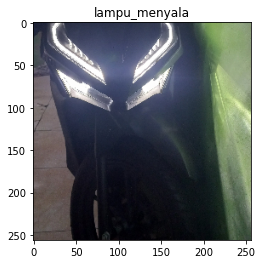

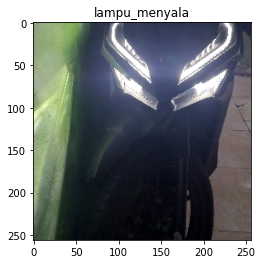

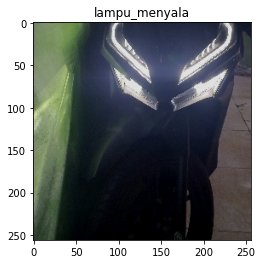

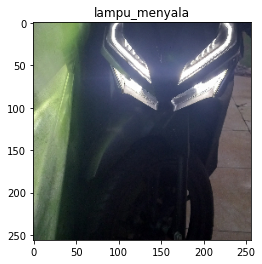

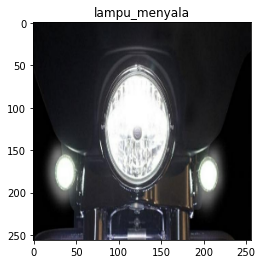

In [453]:
for images, labels in data_test.take(1):
    pred = model_cnn.predict(images)
    for i, r, p in zip(images, labels, pred):
        p = np.round(p[0])
        plt.imshow(i.numpy().astype("uint8"))
        plt.title(class_names[p])
        plt.show()